In [2]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/c3/8b/af9e0984f5c0df06d3fab0bf396eb09cbf05f8452de4e9502b182f59c33b/matplotlib-3.1.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib


In [2]:
import sys
import numpy
import sklearn
import pandas
import matplotlib

In [3]:
print("Python Version is {}".format(sys.version))

Python Version is 3.7.3 (default, Mar 27 2019, 09:23:39) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [4]:
print("Numpy Version is {}".format(numpy.__version__))
print("Matplotlib Version is {}".format(matplotlib.__version__))
print("Sklearn Version is {}".format(sklearn.__version__))
print("Pandas version is {}".format(pandas.__version__))

Numpy Version is 1.16.2
Matplotlib Version is 3.1.1
Sklearn Version is 0.20.3
Pandas version is 0.24.2


In [19]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
        'marginal_adhesion','single_epithelial_size','bare_nuclei',
        'bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url, names=names)


In [22]:
#pre process the data
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
#print the shape
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [14]:
 #do dataset visualisation
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000        

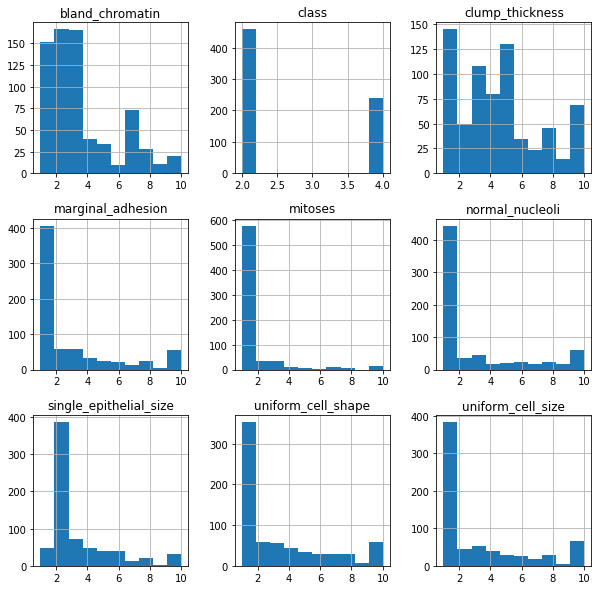

In [23]:
#Plot histograms
df.hist(figsize=(10,10))
plt.show()

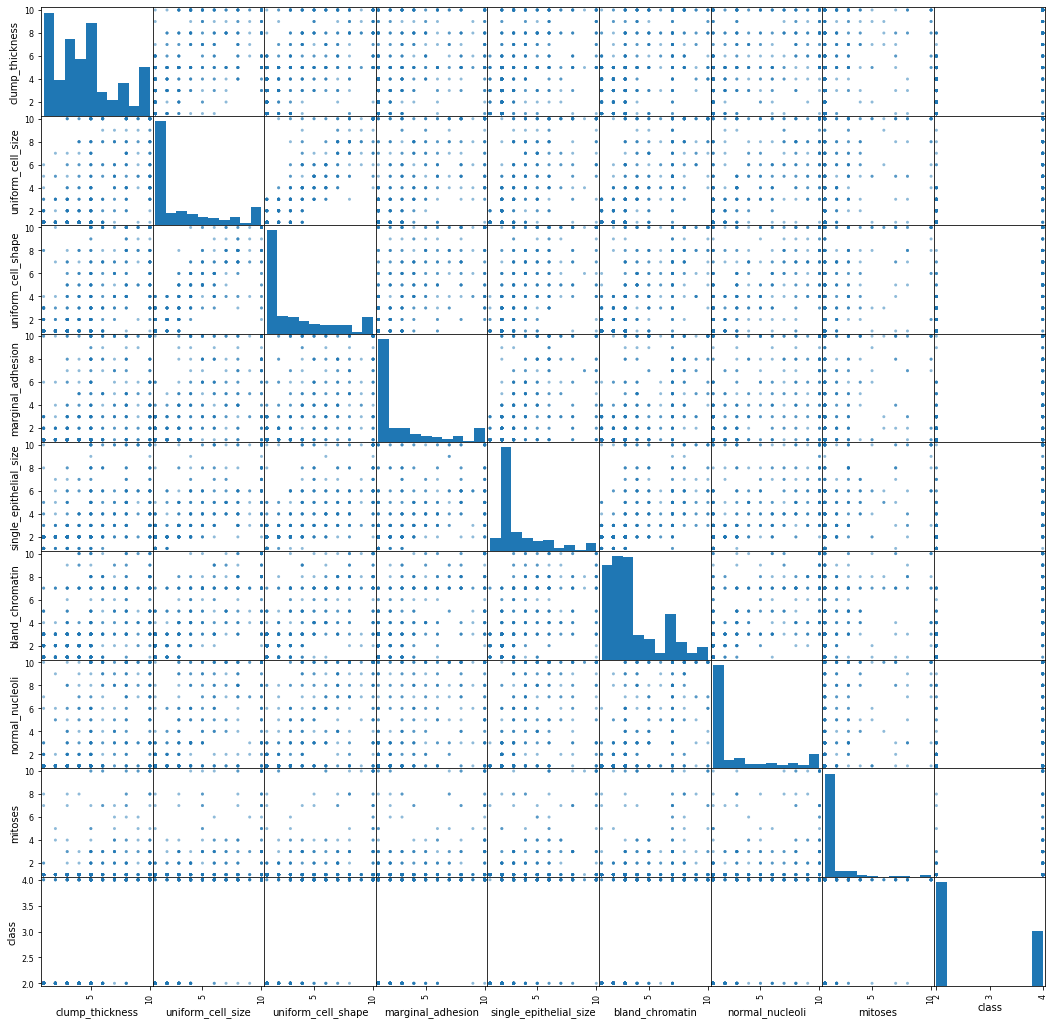

In [16]:
#create scatter plot matrix
scatter_matrix(df, figsize= (18, 18))
plt.show()

In [25]:
# Create X and Y  datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [26]:
#specify testing options
seed = 8
scoring = 'accuracy'

In [35]:
# defining the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate models
results = []
names = []

for _ in range(4):
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
        print(msg)

KNN: 0.971331 (0.012052)
SVM: 0.951591 (0.025773)
KNN: 0.971331 (0.012052)
SVM: 0.951591 (0.025773)
KNN: 0.971331 (0.012052)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

SVM: 0.951591 (0.025773)
KNN: 0.971331 (0.012052)
SVM: 0.951591 (0.025773)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [36]:
#make prediction on validation datasets

for name,model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, prediction))
    print(classification_report(y_test, prediction))

KNN
0.95
              precision    recall  f1-score   support

           2       0.93      0.99      0.96        85
           4       0.98      0.89      0.93        55

   micro avg       0.95      0.95      0.95       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.95      0.95      0.95       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,4]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9714285714285714
[2]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
